**Implementation of a Survival Analysis in R**

Survavial analysis refers to set of methods for analysing data where the response variable is *time until the occurrence of an event of interest*(e.g. death,occurrence of disease etc.

Packages used:survival,survminer,dplyr(to install packages use install.packages function)

Dataset:ovarian{survival}


In [1]:
#loading necessary packages
library("survival")
library("survminer")
library("dplyr")
library("ggplot2")
library("ggpubr")
library("magrittr")

Loading required package: ggplot2
Loading required package: ggpubr
Loading required package: magrittr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
#loading the inbult data set{survival}
data(ovarian)
ovarian

attach(ovarian)

futime,fustat,age,resid.ds,rx,ecog.ps
59,1,72.3315,2,1,1
115,1,74.4932,2,1,1
156,1,66.4658,2,1,2
421,0,53.3644,2,2,1
431,1,50.3397,2,1,1
448,0,56.4301,1,1,2
464,1,56.9370,2,2,2
475,1,59.8548,2,2,2
477,0,64.1753,2,1,1
563,1,55.1781,1,2,2


The following objects are masked from ovarian (pos = 3):

    age, ecog.ps, fustat, futime, resid.ds, rx



In [4]:
#structure of the data
glimpse(ovarian)

Observations: 26
Variables: 6
$ futime   <dbl> 59, 115, 156, 421, 431, 448, 464, 475, 477, 563, 638, 744,...
$ fustat   <dbl> 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ age      <dbl> 72.3315, 74.4932, 66.4658, 53.3644, 50.3397, 56.4301, 56.9...
$ resid.ds <dbl> 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2...
$ rx       <dbl> 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2...
$ ecog.ps  <dbl> 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1...


variables description

**futime**-column holding survival times(Response Variable)

**fustat**-tells if an individual patient survival's time is censored

26 patients in this study received either one of two therapy regimens (**rx**) and the attending physician assessed the regression of tumors (**resid.ds**) and patients’ performance (according to the standardized ECOG criteria; **ecog.ps**) at some point.

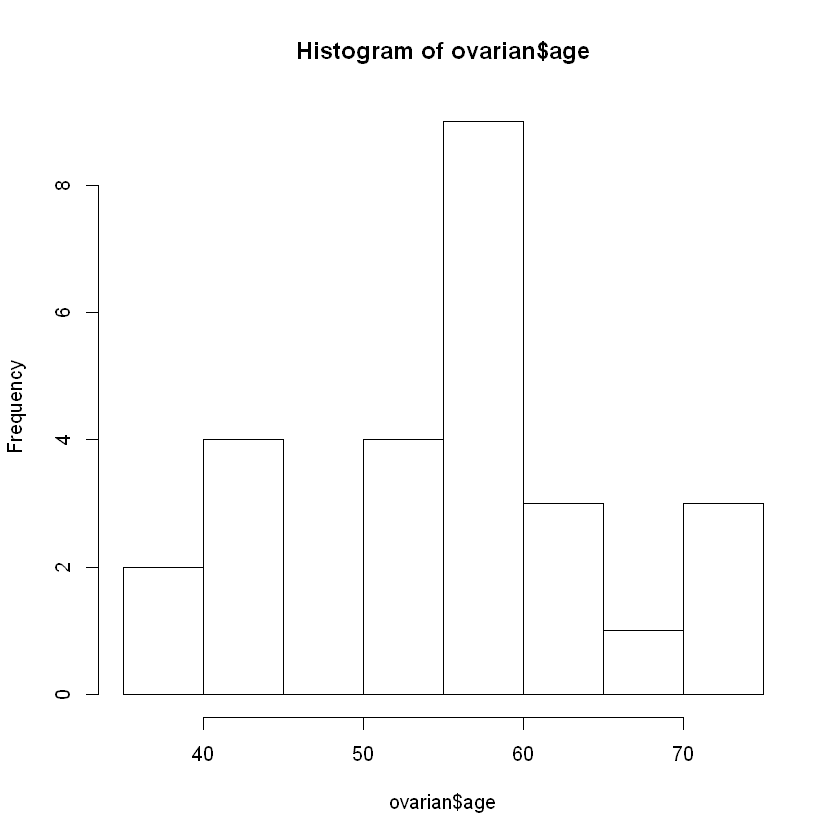

In [5]:
#adding age as a predictive variabe;has to be converted from contiuous to binary
#dichotomus age and change data labels
ovarian$rx <- factor(ovarian$rx, 
                     levels = c("1", "2"), 
                     labels = c("A", "B"))
ovarian$resid.ds <- factor(ovarian$resid.ds, 
                           levels = c("1", "2"), 
                           labels = c("no", "yes"))
ovarian$ecog.ps <- factor(ovarian$ecog.ps, 
                          levels = c("1", "2"), 
                          labels = c("good", "bad"))
# distribution of data
hist(ovarian$age)

The plot suggests that a cut off of 50 years can be used.

*mutate()*-add aditional group group_by

futime and fustat coulmuns are then interpreted by survival function **survfit**

A **+** behind surviavl time indicates censored data points

In [6]:
ovarian <- ovarian %>% mutate(age_group = ifelse(age >=50, "old", "young"))
ovarian$age_group <- factor(ovarian$age_group)

In [7]:
#fit survival data using Kaplan_Meier method
surv_object <- Surv(time = futime, event = fustat)
surv_object

 [1]   59   115   156   421+  431   448+  464   475   477+  563   638   744+
[13]  769+  770+  803+  855+ 1040+ 1106+ 1129+ 1206+ 1227+  268   329   353 
[25]  365   377+

Kaplan-Meier curves;
pass the surv_object to **survfit**.The curve can be divided deepneding onthe treatment rx that the patients were assigned to.

In [8]:
fit1 <- survfit(surv_object ~ rx, data = ovarian)
summary(fit1)

Call: survfit(formula = surv_object ~ rx, data = ovarian)

                rx=A 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   59     13       1    0.923  0.0739        0.789        1.000
  115     12       1    0.846  0.1001        0.671        1.000
  156     11       1    0.769  0.1169        0.571        1.000
  268     10       1    0.692  0.1280        0.482        0.995
  329      9       1    0.615  0.1349        0.400        0.946
  431      8       1    0.538  0.1383        0.326        0.891
  638      5       1    0.431  0.1467        0.221        0.840

                rx=B 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  353     13       1    0.923  0.0739        0.789        1.000
  365     12       1    0.846  0.1001        0.671        1.000
  464      9       1    0.752  0.1256        0.542        1.000
  475      8       1    0.658  0.1407        0.433        1.000
  563      7       1    0.564  0.1488        0.336        0.946


the corresponding surival curve can be examined by passing fit1 to **ggsurvplot**

**pval = TRUE** plots the p value of log rank test as well.

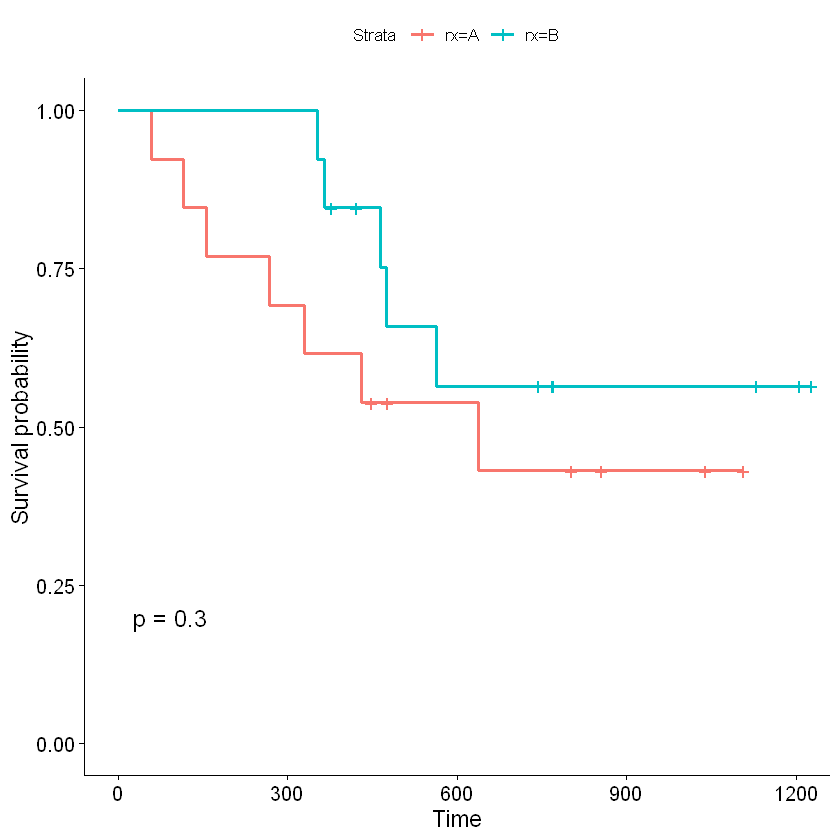

In [9]:
ggsurvplot(fit1, data = ovarian, pval = TRUE)

**Plot description**

Vartical lines indicate censored data and their corresponding x values time at whiich cesnoring time occurs.

The Log-rank p value=0.3,none of the treatments examined were significantly superior although patients receiving treatment B are doing better in the first month of follow-up

In [10]:
# Examine prdictive value of residual disease status
fit2 <- survfit(surv_object ~ resid.ds, data = ovarian)
summary(fit2)

Call: survfit(formula = surv_object ~ resid.ds, data = ovarian)

                resid.ds=no 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  353     11       1    0.909  0.0867        0.754            1
  563      8       1    0.795  0.1306        0.577            1
  638      7       1    0.682  0.1536        0.438            1

                resid.ds=yes 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   59     15       1    0.933  0.0644        0.815        1.000
  115     14       1    0.867  0.0878        0.711        1.000
  156     13       1    0.800  0.1033        0.621        1.000
  268     12       1    0.733  0.1142        0.540        0.995
  329     11       1    0.667  0.1217        0.466        0.953
  365     10       1    0.600  0.1265        0.397        0.907
  431      8       1    0.525  0.1310        0.322        0.856
  464      7       1    0.450  0.1321        0.253        0.800
  475      6       1    0.375  0.1296      

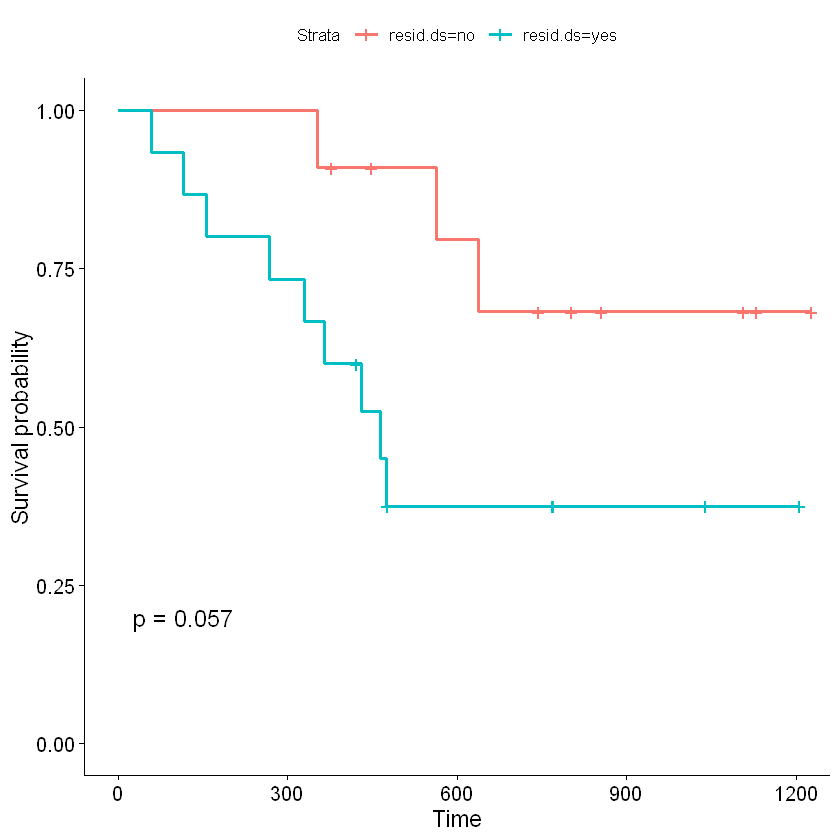

In [11]:
ggsurvplot(fit2, data = ovarian, pval = TRUE)

**interpretation of the results**
The curves diverge early and the log-rank test is almost significant(p value = 0.057)

Cox proportional hazard models allow one to include covariates(I.Vs).

These models can be built suing the funtion(**coxph**) and vizualised using the **ggforest** function(plot is called forest plot)

It shows hazard ratios (HR) which are derived from the model for all covariates that we included in the formula in coxph

HR > 1 indicates an increased risk of death (according to the definition of h(t)) if a specific condition is met by a patient.

HR < 1, on the other hand, indicates a decreased risk. 

Warning message:
"Removed 4 rows containing missing values (geom_errorbar)."

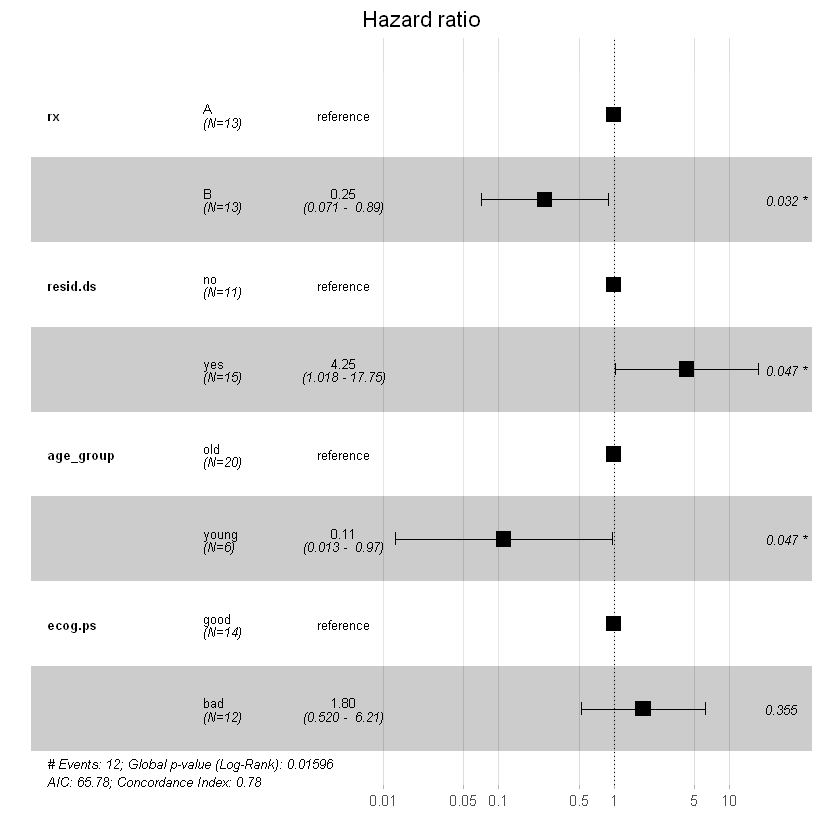

In [12]:
#fit cox proportional hazards model
fit.cox <- coxph(surv_object ~ rx + resid.ds + age_group + ecog.ps, data = ovarian)

ggforest(fit.cox, data = ovarian)

Every HR- respresents a relative risk of death that compares one instance of a binary feature to the other instance.

E.g. HR = 0.25; treatment groups tells you that patients who received treatment B have a reduced risk of dying compared to patients who received treatment A (which served as a reference to calculate the hazard ratio).the forest plot, the respective 95% confidence interval is 0.071 - 0.89 and this result is significant